<h2><center>Acea Smart Water Analytics. Data Understanding.</center></h2>

<center><img src="https://miro.medium.com/max/9600/1*HZ6-7qS2s9i-CcMbZP25NQ.jpeg"></center>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

import matplotlib.pyplot as plt

<a id="0"></a>
<h2 style='background:black; border:0; color:white'><center>0. Short glossary</center><h2>

* An **Aquifer** is an underground layer of water-bearing permeable rock, rock fractures or unconsolidated materials (gravel, sand, or silt). Groundwater can be extracted using a water well.

<left><img width="700" height="500" src="https://i.pinimg.com/originals/8d/aa/da/8daada2ad12924b9f8d84fab45a3c754.jpg"></left>

* A **Water spring** is a point at which water flows from an aquifer to the Earth's surface. It is a component of the hydrosphere.

<left><img width="700" height="500" src="https://sswm.info/sites/default/files/inline-images/SMET%20%26%20WIJK%202002.%20Artesian%20%28fissure%29%20spring.png"></left>

* A **River** is a natural flowing watercourse, usually freshwater, flowing towards an ocean, sea, lake or another river. In some cases a river flows into the ground and becomes dry at the end of its course without reaching another body of water. 

<left><img width="700" height="500" src="https://i.pinimg.com/originals/f4/8c/f4/f48cf4a4d55e47db8b0a5bbac0b4c07f.png"></left>

* A **Lake** is an area filled with water, localized in a basin, surrounded by land, apart from any river or other outlet that serves to feed or drain the lake

<left><img width="700" height="500" src="https://2.bp.blogspot.com/-cQYDI0xTQDk/UeVaic4e8_I/AAAAAAAAAb4/FtQ0PEmux20/w1200-h630-p-k-no-nu/hydrologic_cycle.gif"></left>

<a id="1"></a>
<h2 style='background:black; border:0; color:white'><center>1. Auser</center><h2>

* Waterbody: Auser
* Type: Aquifer

Description: This waterbody consists of two subsystems, called NORTH and SOUTH, where the former partly influences the behavior of the latter. Indeed, the north subsystem is a water table (or unconfined) aquifer while the south subsystem is an artesian (or confined) groundwater.

The levels of the NORTH sector are represented by the values of the SAL, PAG, CoS and DIEC wells, while the levels of the SOUTH sector by the LT2 well.

**Columns to predict: Depth_to_Groundwater_LT2, Depth_to_Groundwater_SAL, Depth_to_Groundwater_CoS**

In [2]:
auser = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Auser.csv')
auser

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189406.533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189406.533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829936.207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189406.533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [3]:
auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [4]:
auser.describe()

,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,Rainfall_Fabbriche_di_Vallico,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
count,5295.000000,5295.000000,5289.000000,5295.000000,5295.000000,4930.000000,5295.000000,5295.000000,5295.000000,5295.000000,...,8154.000000,8154.000000,8154.000000,5.660000e+03,5660.000000,5660.000000,5660.000000,5660.000000,7241.000000,6119.000000
mean,4.948782,3.495449,3.919077,3.150670,4.578961,3.953976,4.578886,2.849745,4.182927,5.922304,...,11.202079,10.971358,15.501134,-1.377222e+05,-16301.825866,-11808.085531,-2352.562424,-1985.775034,0.313618,-0.209204
std,14.366480,9.983772,10.815270,8.747507,12.771166,10.888103,12.461918,9.239679,11.135511,16.281733,...,6.903190,8.708626,7.138789,8.732802e+05,1490.096594,1444.085240,2854.176875,2534.301154,0.213851,0.849013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-7.850000,-2.850000,-3.300000,-7.189407e+06,-18601.920000,-14438.304000,-7757.258065,-9497.774194,0.000000,-1.190000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.650000,0.000000,9.750000,-1.106774e+04,-17081.280000,-12769.920000,-5493.709677,-4354.392857,0.160000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,10.875000,15.400000,-9.855419e+03,-16450.560000,-12078.720000,0.000000,0.000000,0.260000,-0.280000
75%,2.000000,1.000000,1.600000,1.000000,2.000000,1.400000,2.000000,1.400000,2.000000,3.000000,...,16.700000,18.550000,21.600000,-7.850304e+03,-15785.280000,-11015.136000,0.000000,0.000000,0.400000,0.580000
max,318.800000,146.600000,152.200000,108.800000,176.600000,140.800000,209.000000,285.000000,147.200000,197.000000,...,29.500000,30.750000,31.050000,-4.114670e+03,-7149.791935,-5569.298387,0.000000,0.000000,2.170000,3.690000


Let's work with target columns first.

* **Depth_to_Groundwater_LT2**

In [5]:
auser.loc[auser['Depth_to_Groundwater_LT2'].isnull(), 'flag'] = True
auser.loc[auser['Depth_to_Groundwater_LT2'].notnull(), 'flag'] = False

In [6]:
ds = auser['flag'].value_counts().reset_index()
ds.columns = [
    'isNull', 
    'percent'
]

ds['percent'] /= len(auser)

fig = px.pie(
    ds, 
    names='isNull', 
    values='percent', 
    title='Depth_to_Groundwater_LT2 null values', 
    width=700,
    height=500 
)

fig.show()

In [7]:
fig = px.histogram(
    auser, 
    x="Depth_to_Groundwater_LT2",
    nbins=50,
    title='Depth_to_Groundwater_LT2 distribution',
    width=700,
    height=500
)

fig.show()

In [8]:
fig = px.line(
    auser, 
    x="Date",
    y=auser['flag'].astype(np.int8),
    title='Depth_to_Groundwater_LT2 missed values day by day',
    width=700,
    height=500
)

fig.show()

In [9]:
fig = px.line(
    auser, 
    x="Date",
    y='Depth_to_Groundwater_LT2',
    title='Depth_to_Groundwater_LT2 values day by day',
    width=700,
    height=500
)

fig.show()

* **Depth_to_Groundwater_SAL**

In [10]:
auser.loc[auser['Depth_to_Groundwater_SAL'].isnull(), 'flag'] = True
auser.loc[auser['Depth_to_Groundwater_SAL'].notnull(), 'flag'] = False

In [11]:
ds = auser['flag'].value_counts().reset_index()
ds.columns = [
    'isNull', 
    'percent'
]

ds['percent'] /= len(auser)

fig = px.pie(
    ds, 
    names='isNull', 
    values='percent', 
    title='Depth_to_Groundwater_SAL null values', 
    width=700,
    height=500 
)

fig.show()

In [12]:
fig = px.histogram(
    auser, 
    x="Depth_to_Groundwater_SAL",
    nbins=50,
    title='Depth_to_Groundwater_SAL distribution',
    width=700,
    height=500
)

fig.show()

In [13]:
fig = px.line(
    auser, 
    x="Date",
    y=auser['flag'].astype(np.int8),
    title='Depth_to_Groundwater_SAL missed values day by day',
    width=700,
    height=500
)

fig.show()

In [14]:
fig = px.line(
    auser, 
    x="Date",
    y='Depth_to_Groundwater_SAL',
    title='Depth_to_Groundwater_SAL values day by day',
    width=700,
    height=500
)

fig.show()

* **Depth_to_Groundwater_CoS**

In [15]:
auser.loc[auser['Depth_to_Groundwater_CoS'].isnull(), 'flag'] = True
auser.loc[auser['Depth_to_Groundwater_CoS'].notnull(), 'flag'] = False

In [16]:
ds = auser['flag'].value_counts().reset_index()
ds.columns = [
    'isNull', 
    'percent'
]

ds['percent'] /= len(auser)

fig = px.pie(
    ds, 
    names='isNull', 
    values='percent', 
    title='Depth_to_Groundwater_CoS null values', 
    width=700,
    height=500 
)

fig.show()

In [17]:
fig = px.histogram(
    auser, 
    x="Depth_to_Groundwater_CoS",
    nbins=50,
    title='Depth_to_Groundwater_CoS distribution',
    width=700,
    height=500
)

fig.show()

In [18]:
fig = px.line(
    auser, 
    x="Date",
    y=auser['flag'].astype(np.int8),
    title='Depth_to_Groundwater_CoS missed values day by day',
    width=700,
    height=500
)

fig.show()

In [19]:
fig = px.line(
    auser, 
    x="Date",
    y='Depth_to_Groundwater_CoS',
    title='Depth_to_Groundwater_CoS values day by day',
    width=700,
    height=500
)

fig.show()

Let's see correlation between targets.

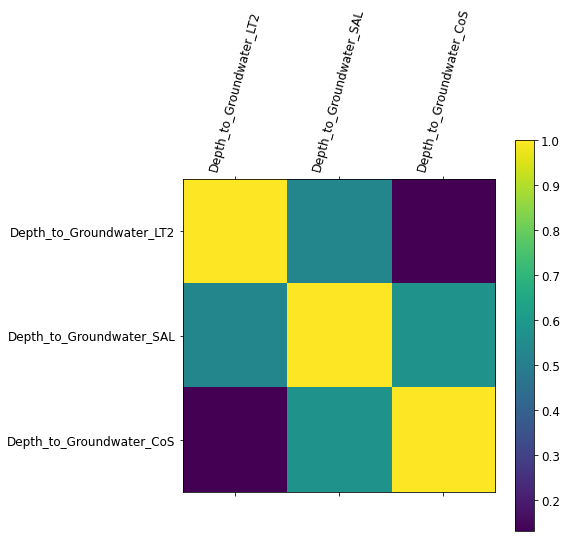

In [20]:
f = plt.figure(
    figsize=(7, 7)
)

plt.matshow(
    auser[['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']].corr(), 
    fignum=f.number
)

plt.xticks(
    range(auser[['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']].shape[1]), 
    auser[['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']].columns, 
    fontsize=12, 
    rotation=75
)

plt.yticks(
    range(auser[['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']].shape[1]), 
    auser[['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']].columns, 
    fontsize=12
)

cb = plt.colorbar()
cb.ax.tick_params(
    labelsize=12
)

<a id="2"></a>
<h2 style='background:black; border:0; color:white'><center>2. Petrignano</center><h2>

* Waterbody: Petrignano
* Type: Aquifer

Description: The wells field of the alluvial plain between Ospedalicchio di Bastia Umbra and Petrignano is fed by three underground aquifers separated by low permeability septa. The aquifer can be considered a water table groundwater and is also fed by the Chiascio river. The groundwater levels are influenced by the following parameters: rainfall, depth to groundwater, temperatures and drainage volumes, level of the Chiascio river.

**Columns to predict: Depth_to_Groundwater_P24, Depth_to_Groundwater_P25**

In [21]:
petrignano = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Petrignano.csv')
petrignano

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [22]:
petrignano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


In [23]:
petrignano.describe()

,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
count,4199.000000,5168.000000,5184.000000,4199.000000,4199.000000,5025.000000,4199.000000
mean,1.556633,-26.263723,-25.692926,15.030293,13.739081,-29043.296726,2.372517
std,5.217923,3.319858,3.214165,7.794871,7.701369,4751.864371,0.589088
min,0.000000,-34.470000,-33.710000,-3.700000,-4.200000,-45544.896000,0.000000
25%,0.000000,-28.250000,-27.620000,8.800000,7.700000,-31678.560000,2.100000
50%,0.000000,-25.990000,-25.540000,14.700000,13.500000,-28689.120000,2.400000
75%,0.100000,-23.820000,-23.430000,21.400000,20.000000,-26218.080000,2.700000
max,67.300000,-19.660000,-19.100000,33.000000,31.100000,0.000000,4.100000


Let's work with target columns first.

* **Depth_to_Groundwater_P24**

In [24]:
petrignano.loc[petrignano['Depth_to_Groundwater_P24'].isnull(), 'flag'] = True
petrignano.loc[petrignano['Depth_to_Groundwater_P24'].notnull(), 'flag'] = False

In [25]:
ds = petrignano['flag'].value_counts().reset_index()
ds.columns = [
    'isNull', 
    'percent'
]

ds['percent'] /= len(auser)

fig = px.pie(
    ds, 
    names='isNull', 
    values='percent', 
    title='Depth_to_Groundwater_P24 null values', 
    width=700,
    height=500 
)

fig.show()

In [26]:
fig = px.histogram(
    petrignano, 
    x="Depth_to_Groundwater_P24",
    nbins=50,
    title='Depth_to_Groundwater_P24 distribution',
    width=700,
    height=500
)

fig.show()

In [27]:
fig = px.line(
    petrignano, 
    x="Date",
    y=petrignano['flag'].astype(np.int8),
    title='Depth_to_Groundwater_P24 missed values day by day',
    width=700,
    height=500
)

fig.show()

In [28]:
fig = px.line(
    petrignano, 
    x="Date",
    y='Depth_to_Groundwater_P24',
    title='Depth_to_Groundwater_P24 values day by day',
    width=700,
    height=500
)

fig.show()

* **Depth_to_Groundwater_P25**

In [29]:
petrignano.loc[petrignano['Depth_to_Groundwater_P25'].isnull(), 'flag'] = True
petrignano.loc[petrignano['Depth_to_Groundwater_P25'].notnull(), 'flag'] = False

In [30]:
ds = petrignano['flag'].value_counts().reset_index()
ds.columns = [
    'isNull', 
    'percent'
]

ds['percent'] /= len(auser)

fig = px.pie(
    ds, 
    names='isNull', 
    values='percent', 
    title='Depth_to_Groundwater_P25 null values', 
    width=700,
    height=500 
)

fig.show()

In [31]:
fig = px.histogram(
    petrignano, 
    x="Depth_to_Groundwater_P25",
    nbins=50,
    title='Depth_to_Groundwater_P25 distribution',
    width=700,
    height=500
)

fig.show()

In [32]:
fig = px.line(
    petrignano, 
    x="Date",
    y=petrignano['flag'].astype(np.int8),
    title='Depth_to_Groundwater_P25 missed values day by day',
    width=700,
    height=500
)

fig.show()

In [33]:
fig = px.line(
    petrignano, 
    x="Date",
    y='Depth_to_Groundwater_P25',
    title='Depth_to_Groundwater_P25 values day by day',
    width=700,
    height=500
)

fig.show()

Correlation between targets.

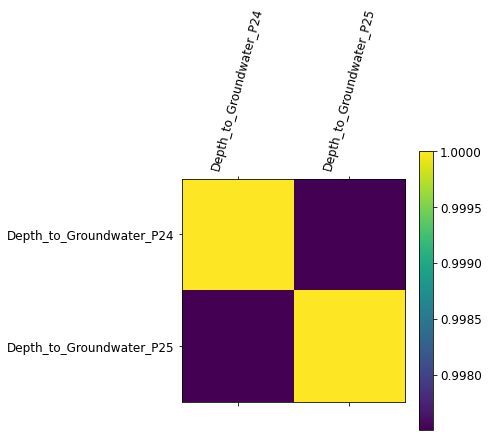

In [34]:
f = plt.figure(
    figsize=(5, 5)
)

plt.matshow(
    petrignano[['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].corr(), 
    fignum=f.number
)

plt.xticks(
    range(petrignano[['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].shape[1]), 
    petrignano[['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].columns, 
    fontsize=12, 
    rotation=75
)

plt.yticks(
    range(petrignano[['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].shape[1]), 
    petrignano[['Depth_to_Groundwater_P24', 'Depth_to_Groundwater_P25']].columns, 
    fontsize=12
)

cb = plt.colorbar()
cb.ax.tick_params(
    labelsize=12
)

<a id="3"></a>
<h2 style='background:black; border:0; color:white'><center>3. Doganella</center><h2>

* Waterbody: Doganella
* Type: Aquifer

Description: The wells field Doganella is fed by two underground aquifers not fed by rivers or lakes but fed by meteoric infiltration. The upper aquifer is a water table with a thickness of about 30m. The lower aquifer is a semi-confined artesian aquifer with a thickness of 50m and is located inside lavas and tufa products. These aquifers are accessed through wells called Well 1, ..., Well 9. Approximately 80% of the drainage volumes come from the artesian aquifer. The aquifer levels are influenced by the following parameters: rainfall, humidity, subsoil, temperatures and drainage volumes.


**Columns to predict: Depth_to_Groundwater_Pozzo_1, Depth_to_Groundwater_Pozzo_2, Depth_to_Groundwater_Pozzo_3, Depth_to_Groundwater_Pozzo_4, Depth_to_Groundwater_Pozzo_5, Depth_to_Groundwater_Pozzo_6, Depth_to_Groundwater_Pozzo_7, Depth_to_Groundwater_Pozzo_8, Depth_to_Groundwater_Pozzo_9**

In [35]:
doganella = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Doganella.csv')
doganella

,Date,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
0,01/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.30,8.60
1,02/01/2004,0.2,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.70,6.25
2,03/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.40,9.80
3,04/01/2004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.35,5.95
4,05/01/2004,0.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.60,5.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6021,26/06/2020,0.0,0.0,-50.32,-100.35,-100.880,-101.49,-104.31,-97.94,-96.59,...,1516.104,3883.932,2526.516,3867.876,7949.304,2684.412,3911.832,3450.132,21.05,23.39
6022,27/06/2020,0.0,0.0,-50.32,-100.56,-100.840,-101.59,-104.30,-97.96,-96.44,...,1491.408,3884.724,2871.864,3867.300,7590.564,2681.280,3899.772,3449.088,22.18,24.44
6023,28/06/2020,0.0,0.0,-50.32,-100.56,-100.920,-101.59,-104.30,-98.46,-96.44,...,1485.756,3885.228,2858.400,3869.352,7944.660,2962.980,3901.032,3449.808,23.06,25.43
6024,29/06/2020,0.0,0.0,-50.32,-100.56,-101.190,-101.59,-104.30,-98.46,-96.10,...,1479.636,3888.684,2499.444,3873.096,7947.684,2653.884,3904.776,3129.336,22.03,24.22


In [36]:
doganella.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6026 entries, 0 to 6025
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          6026 non-null   object 
 1   Rainfall_Monteporzio          5399 non-null   float64
 2   Rainfall_Velletri             5374 non-null   float64
 3   Depth_to_Groundwater_Pozzo_1  2537 non-null   float64
 4   Depth_to_Groundwater_Pozzo_2  2736 non-null   float64
 5   Depth_to_Groundwater_Pozzo_3  2774 non-null   float64
 6   Depth_to_Groundwater_Pozzo_4  2374 non-null   float64
 7   Depth_to_Groundwater_Pozzo_5  2508 non-null   float64
 8   Depth_to_Groundwater_Pozzo_6  2428 non-null   float64
 9   Depth_to_Groundwater_Pozzo_7  2311 non-null   float64
 10  Depth_to_Groundwater_Pozzo_8  2551 non-null   float64
 11  Depth_to_Groundwater_Pozzo_9  2339 non-null   float64
 12  Volume_Pozzo_1                1356 non-null   float64
 13  Vol

In [37]:
doganella.describe()

,Rainfall_Monteporzio,Rainfall_Velletri,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_2,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Depth_to_Groundwater_Pozzo_5,Depth_to_Groundwater_Pozzo_6,Depth_to_Groundwater_Pozzo_7,Depth_to_Groundwater_Pozzo_8,...,Volume_Pozzo_1,Volume_Pozzo_2,Volume_Pozzo_3,Volume_Pozzo_4,Volume_Pozzo_5+6,Volume_Pozzo_7,Volume_Pozzo_8,Volume_Pozzo_9,Temperature_Monteporzio,Temperature_Velletri
count,5399.000000,5374.000000,2537.000000,2736.000000,2774.000000,2374.000000,2508.000000,2428.000000,2311.000000,2551.000000,...,1356.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,1360.000000,4564.000000,4383.000000
mean,2.893758,3.159732,-36.929137,-94.746188,-111.638928,-98.223934,-102.552596,-91.672955,-95.819225,-95.845370,...,1529.376211,3433.485746,3208.114931,3527.627374,7178.560713,2491.400685,3660.482101,3239.807765,13.458457,15.574038
std,8.624455,8.913341,10.179111,3.891286,3.809581,2.391763,3.711563,2.216446,1.686417,2.523905,...,1154.952073,772.564645,1084.939228,700.013152,1607.944298,671.378069,813.007457,730.314145,6.763101,6.352674
min,0.000000,0.000000,-59.500000,-112.500000,-117.800000,-108.660000,-109.890000,-99.480000,-97.430000,-107.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.620000,-0.270000
25%,0.000000,0.000000,-45.250000,-98.460000,-115.077500,-100.500000,-104.450000,-92.947500,-97.350000,-97.840000,...,484.695000,3521.215000,2730.862500,3596.372500,7272.557500,2282.235000,3795.562500,3110.930000,8.085000,10.365000
50%,0.000000,0.000000,-34.900000,-93.280000,-111.805000,-97.970000,-101.815000,-91.500000,-96.570000,-95.320000,...,1408.860000,3591.810000,3215.880000,3667.210000,7854.750000,2677.160000,3894.375000,3378.455000,13.050000,15.150000
75%,0.600000,0.600000,-28.510000,-91.290000,-108.030000,-96.050000,-99.867500,-90.027500,-94.020000,-93.595000,...,2546.995000,3845.600000,3734.505000,3864.400000,7999.130000,2917.105000,3988.800000,3466.797500,18.992500,20.725000
max,112.600000,106.600000,-20.310000,-89.670000,-100.590000,-94.000000,-96.220000,-88.600000,-91.640000,-92.470000,...,4171.280000,4030.270000,5378.800000,4076.100000,8360.210000,3427.420000,4341.710000,4336.780000,30.400000,31.900000


<a id="4"></a>
<h2 style='background:black; border:0; color:white'><center>4. Luco</center><h2>

* Waterbody: Luco
* Type: Aquifer

Description: The Luco wells field is fed by an underground aquifer. This aquifer not fed by rivers or lakes but by meteoric infiltration at the extremes of the impermeable sedimentary layers. Such aquifer is accessed through wells called Well 1, Well 3 and Well 4 and is influenced by the following parameters: rainfall, depth to groundwater, temperature and drainage volumes.

**Columns to predict: Depth_to_Groundwater_Podere_Casetta**

In [38]:
luco = pd.read_csv('/kaggle/input/acea-water-prediction/Aquifer_Luco.csv')
luco

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.00,0.00,7.90,6.55,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.0,-10.7,-11.1,24.45,22.65,22.50,19.55,-125.506506,-147.012716,-49.136663
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.8,-11.1,24.80,22.95,22.60,20.15,-125.506506,-147.012716,-49.136663
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.7,-11.1,25.90,23.40,23.80,21.05,-125.506506,-147.012716,-49.136663
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.2,-10.8,-11.1,24.85,23.30,23.55,20.30,-125.506506,-147.012716,-49.136663


In [39]:
luco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Date                                 7487 non-null   object 
 1   Rainfall_Simignano                   6822 non-null   float64
 2   Rainfall_Siena_Poggio_al_Vento       951 non-null    float64
 3   Rainfall_Mensano                     1722 non-null   float64
 4   Rainfall_Montalcinello               6525 non-null   float64
 5   Rainfall_Monticiano_la_Pineta        2205 non-null   float64
 6   Rainfall_Sovicille                   6657 non-null   float64
 7   Rainfall_Ponte_Orgia                 1260 non-null   float64
 8   Rainfall_Scorgiano                   3036 non-null   float64
 9   Rainfall_Pentolina                   2116 non-null   float64
 10  Rainfall_Monteroni_Arbia_Biena       3104 non-null   float64
 11  Depth_to_Groundwater_Podere_Ca

In [40]:
luco.describe()

,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
count,6822.00000,951.000000,1722.000000,6525.000000,2205.000000,6657.000000,1260.000000,3036.000000,2116.000000,3104.000000,...,1012.000000,920.000000,969.000000,7487.000000,7487.000000,7487.000000,7487.000000,2008.000000,2008.000000,2008.000000
mean,2.52146,2.269821,2.560743,2.477579,3.105850,2.281959,2.366825,3.222134,8.734783,2.391108,...,-11.100692,-9.892256,-13.098520,1.903954,3.343248,13.419761,13.593736,-160.684377,-147.773134,-135.214663
std,7.09014,6.039464,10.279711,7.488022,9.496626,7.053183,6.813364,21.307151,52.149236,7.602140,...,0.836808,0.667793,2.571084,5.602519,6.923075,7.249467,7.199626,51.220771,55.643788,56.818120
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-12.600000,-11.900000,-19.000000,-3.550000,-5.250000,-4.800000,-3.900000,-295.375015,-261.849600,-237.336612
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-11.600000,-10.300000,-13.000000,0.000000,0.000000,7.950000,7.950000,-198.758660,-189.343442,-175.177124
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-11.200000,-9.800000,-12.700000,0.000000,0.000000,13.200000,13.700000,-163.545061,-148.874123,-145.845891
75%,0.60000,1.200000,0.600000,0.600000,0.800000,0.400000,0.600000,0.800000,1.200000,0.600000,...,-10.600000,-9.400000,-11.400000,0.000000,0.000000,19.350000,19.650000,-119.615001,-110.467100,-96.849815
max,87.80000,79.200000,313.000000,134.600000,171.000000,194.200000,90.000000,794.200000,620.800000,137.600000,...,-2.800000,-8.200000,0.000000,31.800000,31.850000,31.300000,29.450000,-55.433467,0.000000,-0.053438


<a id="5"></a>
<h2 style='background:black; border:0; color:white'><center>5. Amiata</center><h2>

* Waterbody: Amiata
* Type: Water spring

Description: The Amiata waterbody is composed of a volcanic aquifer not fed by rivers or lakes but fed by meteoric infiltration. This aquifer is accessed through Ermicciolo, Arbure, Bugnano and Galleria Alta water springs. The levels and volumes of the four sources are influenced by the parameters: rainfall, depth to groundwater, hydrometry, temperatures and drainage volumes.

**Columns to predict: Flow_Rate_Bugnano, Flow_Rate_Arbure, Flow_Rate_Ermicciolo, Flow_Rate_Galleria_Alta**

In [41]:
amiata = pd.read_csv('/kaggle/input/acea-water-prediction/Water_Spring_Amiata.csv')
amiata

,Date,Rainfall_Castel_del_Piano,Rainfall_Abbadia_S_Salvatore,Rainfall_S_Fiora,Rainfall_Laghetto_Verde,Rainfall_Vetta_Amiata,Depth_to_Groundwater_S_Fiora_8,Depth_to_Groundwater_S_Fiora_11bis,Depth_to_Groundwater_David_Lazzaretti,Temperature_Abbadia_S_Salvatore,Temperature_S_Fiora,Temperature_Laghetto_Verde,Flow_Rate_Bugnano,Flow_Rate_Arbure,Flow_Rate_Ermicciolo,Flow_Rate_Galleria_Alta
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.15,NaN,NaN,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.55,NaN,NaN,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,NaN,NaN,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.00,NaN,NaN,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.60,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.70,18.30,19.20,-0.359942,-2.925253,-5.75661,-21.358856
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,20.50,17.95,18.85,-0.359942,-2.925253,-5.75661,-21.358856
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,-38.38,-51.89,-303.27,22.10,19.90,20.45,-0.341945,-2.778991,-5.46878,-20.290913
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,-38.37,-51.89,-303.28,22.45,20.15,20.20,-0.359942,-2.925253,-5.75661,-21.358856


In [42]:
amiata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7487 entries, 0 to 7486
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   7487 non-null   object 
 1   Rainfall_Castel_del_Piano              6291 non-null   float64
 2   Rainfall_Abbadia_S_Salvatore           3586 non-null   float64
 3   Rainfall_S_Fiora                       2633 non-null   float64
 4   Rainfall_Laghetto_Verde                2865 non-null   float64
 5   Rainfall_Vetta_Amiata                  2212 non-null   float64
 6   Depth_to_Groundwater_S_Fiora_8         3569 non-null   float64
 7   Depth_to_Groundwater_S_Fiora_11bis     3594 non-null   float64
 8   Depth_to_Groundwater_David_Lazzaretti  3242 non-null   float64
 9   Temperature_Abbadia_S_Salvatore        3583 non-null   float64
 10  Temperature_S_Fiora                    7487 non-null   float64
 11  Temp

In [43]:
luco.describe()

,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,Rainfall_Monteroni_Arbia_Biena,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
count,6822.00000,951.000000,1722.000000,6525.000000,2205.000000,6657.000000,1260.000000,3036.000000,2116.000000,3104.000000,...,1012.000000,920.000000,969.000000,7487.000000,7487.000000,7487.000000,7487.000000,2008.000000,2008.000000,2008.000000
mean,2.52146,2.269821,2.560743,2.477579,3.105850,2.281959,2.366825,3.222134,8.734783,2.391108,...,-11.100692,-9.892256,-13.098520,1.903954,3.343248,13.419761,13.593736,-160.684377,-147.773134,-135.214663
std,7.09014,6.039464,10.279711,7.488022,9.496626,7.053183,6.813364,21.307151,52.149236,7.602140,...,0.836808,0.667793,2.571084,5.602519,6.923075,7.249467,7.199626,51.220771,55.643788,56.818120
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-12.600000,-11.900000,-19.000000,-3.550000,-5.250000,-4.800000,-3.900000,-295.375015,-261.849600,-237.336612
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-11.600000,-10.300000,-13.000000,0.000000,0.000000,7.950000,7.950000,-198.758660,-189.343442,-175.177124
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-11.200000,-9.800000,-12.700000,0.000000,0.000000,13.200000,13.700000,-163.545061,-148.874123,-145.845891
75%,0.60000,1.200000,0.600000,0.600000,0.800000,0.400000,0.600000,0.800000,1.200000,0.600000,...,-10.600000,-9.400000,-11.400000,0.000000,0.000000,19.350000,19.650000,-119.615001,-110.467100,-96.849815
max,87.80000,79.200000,313.000000,134.600000,171.000000,194.200000,90.000000,794.200000,620.800000,137.600000,...,-2.800000,-8.200000,0.000000,31.800000,31.850000,31.300000,29.450000,-55.433467,0.000000,-0.053438


<a id="6"></a>
<h2 style='background:black; border:0; color:white'><center>6. Madonna di Canneto</center><h2>

* Waterbody: Madonna di Canneto
* Type: Water spring

Description: The Madonna di Canneto spring is situated at an altitude of 1010m above sea level in the Canneto valley. It does not consist of an aquifer and its source is supplied by the water catchment area of the river Melfa.

**Columns to predict: Flow_Rate_Madonna_di_Canneto**

In [44]:
madonna = pd.read_csv('/kaggle/input/acea-water-prediction/Water_Spring_Madonna_di_Canneto.csv')
madonna

,Date,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
0,01/01/2012,0.0,5.25,NaN
1,02/01/2012,5.6,6.65,NaN
2,03/01/2012,10.0,8.85,NaN
3,04/01/2012,0.0,6.75,NaN
4,05/01/2012,1.0,5.55,NaN
...,...,...,...,...
3108,NaN,NaN,NaN,NaN
3109,NaN,NaN,NaN,NaN
3110,NaN,NaN,NaN,NaN
3111,NaN,NaN,NaN,NaN


In [45]:
madonna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          3104 non-null   object 
 1   Rainfall_Settefrati           2557 non-null   float64
 2   Temperature_Settefrati        2557 non-null   float64
 3   Flow_Rate_Madonna_di_Canneto  1387 non-null   float64
dtypes: float64(3), object(1)
memory usage: 97.4+ KB


In [46]:
madonna.describe()

,Rainfall_Settefrati,Temperature_Settefrati,Flow_Rate_Madonna_di_Canneto
count,2557.000000,2557.000000,1387.000000
mean,4.252444,13.561732,263.160470
std,10.242426,6.959375,32.073660
min,0.000000,-4.900000,187.753182
25%,0.000000,7.600000,224.659081
50%,0.000000,13.300000,277.045159
75%,3.600000,19.050000,290.165584
max,140.800000,31.100000,300.160983


<a id="7"></a>
<h2 style='background:black; border:0; color:white'><center>7. Lupa</center><h2>

* Waterbody: Lupa
* Type: Water spring

Description: this water spring is located in the Rosciano Valley, on the left side of the Nera river. The waters emerge at an altitude of about 375 meters above sea level through a long draining tunnel that crosses, in its final section, lithotypes and essentially calcareous rocks. It provides drinking water to the city of Terni and the towns around it.

**Columns to predict: Flow_Rate_Lupa**

In [47]:
lupa = pd.read_csv('/kaggle/input/acea-water-prediction/Water_Spring_Lupa.csv')
lupa

,Date,Rainfall_Terni,Flow_Rate_Lupa
0,01/01/2009,2.797,NaN
1,02/01/2009,2.797,NaN
2,03/01/2009,2.797,NaN
3,04/01/2009,2.797,NaN
4,05/01/2009,2.797,NaN
...,...,...,...
4194,26/06/2020,0.000,-73.93
4195,27/06/2020,0.000,-73.60
4196,28/06/2020,0.000,-73.14
4197,29/06/2020,0.000,-72.88


In [48]:
lupa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4199 entries, 0 to 4198
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            4199 non-null   object 
 1   Rainfall_Terni  4199 non-null   float64
 2   Flow_Rate_Lupa  3817 non-null   float64
dtypes: float64(2), object(1)
memory usage: 98.5+ KB


In [49]:
lupa.describe()

,Rainfall_Terni,Flow_Rate_Lupa
count,4199.000000,3817.000000
mean,2.466355,-97.712916
std,2.041837,15.026314
min,0.000000,-182.310000
25%,1.402000,-105.760000
50%,2.142000,-96.590000
75%,3.165000,-87.220000
max,76.000000,0.000000


<a id="8"></a>
<h2 style='background:black; border:0; color:white'><center>8. Arno</center><h2>

* Waterbody: Arno
* Type: River

Description: Arno is the second largest river in peninsular Italy and the main waterway in Tuscany and it has a relatively torrential regime, due to the nature of the surrounding soils (marl and impermeable clays). Arno results to be the main source of water supply of the metropolitan area of Florence-Prato-Pistoia. The availability of water for this waterbody is evaluated by checking the hydrometric level of the river at the section of Nave di Rosano.

**Columns to predict: Hydrometry_Nave_di_Rosano**

In [50]:
arno = pd.read_csv('/kaggle/input/acea-water-prediction/River_Arno.csv')
arno

,Date,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
0,01/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.82
1,02/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.94
2,03/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.11
3,04/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.84
4,05/01/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,26/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.34
8213,27/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.21
8214,28/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.30
8215,29/06/2020,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.19


In [51]:
arno.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8217 entries, 0 to 8216
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8217 non-null   object 
 1   Rainfall_Le_Croci          6026 non-null   float64
 2   Rainfall_Cavallina         6026 non-null   float64
 3   Rainfall_S_Agata           6026 non-null   float64
 4   Rainfall_Mangona           6026 non-null   float64
 5   Rainfall_S_Piero           6026 non-null   float64
 6   Rainfall_Vernio            4283 non-null   float64
 7   Rainfall_Stia              1283 non-null   float64
 8   Rainfall_Consuma           1283 non-null   float64
 9   Rainfall_Incisa            4568 non-null   float64
 10  Rainfall_Montevarchi       1647 non-null   float64
 11  Rainfall_S_Savino          1283 non-null   float64
 12  Rainfall_Laterina          1283 non-null   float64
 13  Rainfall_Bibbiena          2378 non-null   float

In [52]:
arno.describe()

,Rainfall_Le_Croci,Rainfall_Cavallina,Rainfall_S_Agata,Rainfall_Mangona,Rainfall_S_Piero,Rainfall_Vernio,Rainfall_Stia,Rainfall_Consuma,Rainfall_Incisa,Rainfall_Montevarchi,Rainfall_S_Savino,Rainfall_Laterina,Rainfall_Bibbiena,Rainfall_Camaldoli,Temperature_Firenze,Hydrometry_Nave_di_Rosano
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,4283.000000,1283.000000,1283.000000,4568.000000,1647.000000,1283.00000,1283.000000,2378.000000,1283.000000,6192.000000,8169.000000
mean,3.129871,2.674743,2.670063,3.340657,2.471225,3.416437,2.538893,3.416680,2.335026,2.056709,2.42650,2.101949,2.640959,3.826968,16.605386,1.472407
std,8.025121,7.655847,7.166643,8.903134,6.650012,9.425358,6.502917,8.938863,6.347652,6.117967,7.23414,6.377879,7.161416,9.591337,7.458951,0.616259
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-2.700000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,10.650000,1.100000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,16.350000,1.300000
75%,1.200000,0.600000,1.200000,1.400000,0.800000,1.200000,1.000000,2.200000,0.800000,0.600000,0.70000,0.400000,1.200000,2.400000,22.700000,1.690000
max,88.400000,113.600000,120.200000,110.000000,80.600000,126.000000,63.000000,114.400000,102.200000,75.000000,123.20000,95.600000,77.400000,103.600000,34.900000,6.750000


<a id="9"></a>
<h2 style='background:black; border:0; color:white'><center>9. Bilancino</center><h2>

* Waterbody: Bilancino
* Type: Lake

Description: Bilancino lake is an artificial lake located in the municipality of Barberino di Mugello (about 50 km from Florence). It is used to refill the Arno river during the summer months. Indeed, during the winter months, the lake is filled up and then, during the summer months, the water of the lake is poured into the Arno river.

**Columns to predict: Lake_Level, Flow_Rate**

In [53]:
bilancino = pd.read_csv('/kaggle/input/acea-water-prediction/Lake_Bilancino.csv')
bilancino

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31
...,...,...,...,...,...,...,...,...,...
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.60
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.60
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.60
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.60


In [54]:
bilancino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [55]:
bilancino.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000
